# Import software libraries and load the dataset #

In [1]:
import sys                             # Read system parameters.
import numpy as np                     # Work with multi-dimensional arrays and matrices.
import pandas as pd                    # Manipulate and analyze data.
import matplotlib as mpl               # Create 2D charts.
import matplotlib.pyplot as plt
import sklearn                         # Perform data mining and analysis.
from sklearn import datasets
from sklearn.utils import shuffle
from time import time                  # Calculate training time.
import math

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(mpl.__version__))
print('- scikit-learn {}\n'.format(sklearn.__version__))

# Load the dataset.
wine = datasets.load_wine()
print('Loaded {} records.'.format(len(wine.data)))

Libraries used in this project:
- Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
- NumPy 1.16.2
- pandas 0.24.2
- Matplotlib 3.0.3
- scikit-learn 0.20.3

Loaded 178 records.


# Get acquainted with the dataset #

In [2]:
# Convert array to pandas DataFrame.
data_raw = pd.DataFrame(wine['data'], columns=wine['feature_names'])
data_raw['target'] = wine['target']

# Shuffle the dataset.
data_raw = shuffle(data_raw.copy(), random_state = 765)
data_raw.reset_index(inplace = True, drop = True)

print(data_raw.info())      # View data types and see if there are missing entries.
data_raw.head(10)           # View first 10 records.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
target                          178 non-null int64
dtypes: float64(13), int64(1)
memory usage: 19.5 KB
None


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.69,3.26,2.54,20.0,107.0,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680.0,2
1,12.67,0.98,2.24,18.0,99.0,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450.0,1
2,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0
3,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0,0
4,13.41,3.84,2.12,18.8,90.0,2.45,2.68,0.27,1.48,4.28,0.91,3.00,1035.0,0
5,12.20,3.03,2.32,19.0,96.0,1.25,0.49,0.40,0.73,5.50,0.66,1.83,510.0,2
6,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0,0
7,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0,1
8,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150.0,0
9,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,1


# Examine a general summary of statistics

In [3]:
with pd.option_context('float_format', '{:.2f}'.format): 
    print(data_raw.describe())

       alcohol  malic_acid    ash  alcalinity_of_ash  magnesium  \
count   178.00      178.00 178.00             178.00     178.00   
mean     13.00        2.34   2.37              19.49      99.74   
std       0.81        1.12   0.27               3.34      14.28   
min      11.03        0.74   1.36              10.60      70.00   
25%      12.36        1.60   2.21              17.20      88.00   
50%      13.05        1.87   2.36              19.50      98.00   
75%      13.68        3.08   2.56              21.50     107.00   
max      14.83        5.80   3.23              30.00     162.00   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count         178.00      178.00                178.00           178.00   
mean            2.30        2.03                  0.36             1.59   
std             0.63        1.00                  0.12             0.57   
min             0.98        0.34                  0.13             0.41   
25%             1.74 

# Examine the distribution of various features

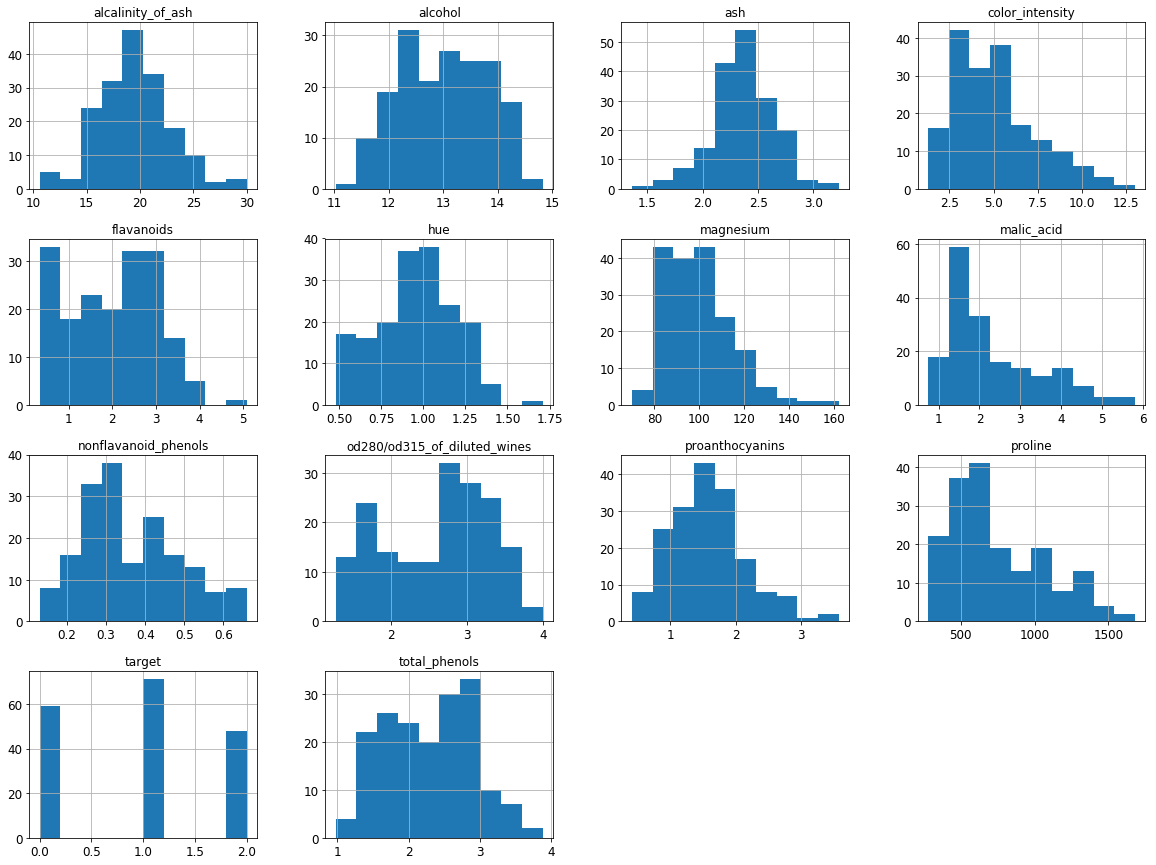

<Figure size 432x288 with 0 Axes>

In [4]:
# Use Matplotlib to plot figures.
%matplotlib inline
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

data_raw.hist(figsize = (20, 15));
plt.figure();

# Split the label from the dataset

In [5]:
# 'target' is the dependent variable (value to be predicted), so it will be
# removed from the training data and put into a separate DataFrame for labels.
label_columns = ['target']

training_columns = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

X, y = data_raw[training_columns], data_raw[label_columns]

# Compare the number of columns in the original data to the new training and label sets.
print(f'Original set:    {data_raw.shape}')
print('------------------------------')
print(f'Training data:   {X.shape}')
print(f'Training labels: {y.shape}')

Original set:    (178, 14)
------------------------------
Training data:   (178, 13)
Training labels: (178, 1)


# Transform `magnesium` and `proline`

In [6]:
# Apply a log transformation to scale 'magnesium' and 'proline'.
X = X.copy()
X['proline'] = np.log(X['proline'])
X['magnesium'] = np.log(X['magnesium'])

# Examine results of the transformation
with pd.option_context('float_format', '{:.2f}'.format): 
    print(X['magnesium'].describe())
    print('\n-----------------------')
    print(X['proline'].describe())
    
X.head()

count   178.00
mean      4.59
std       0.14
min       4.25
25%       4.48
50%       4.58
75%       4.67
max       5.09
Name: magnesium, dtype: float64

-----------------------
count   178.00
mean      6.53
std       0.42
min       5.63
25%       6.22
50%       6.51
75%       6.89
max       7.43
Name: proline, dtype: float64


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.69,3.26,2.54,20.0,4.672829,1.83,0.56,0.50,0.80,5.88,0.96,1.82,6.522093
1,12.67,0.98,2.24,18.0,4.595120,2.20,1.94,0.30,1.46,2.62,1.23,3.16,6.109248
2,13.86,1.35,2.27,16.0,4.584967,2.98,3.15,0.22,1.85,7.22,1.01,3.55,6.951772
3,13.73,1.50,2.70,22.5,4.615121,3.00,3.25,0.29,2.38,5.70,1.19,2.71,7.158514
4,13.41,3.84,2.12,18.8,4.499810,2.45,2.68,0.27,1.48,4.28,0.91,3.00,6.942157


# Create a multinomial logistic regression model

In [7]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='sag', multi_class='multinomial', max_iter=10000)

print('Multinomial logistic regression model created.')

Multinomial logistic regression model created.


# Train the model using stratified *k*-fold cross-validation to split the dataset

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Train model and make predictions using test data.
start = time()
predict = cross_val_predict(log_reg, X, np.ravel(y), cv = 5)
end = time()
train_time = (end - start) * 1000

# Retrieve mean score of test folds.
score = cross_val_score(log_reg, X, np.ravel(y), cv = 5).mean()

print('Multinomial logistic regression model took {:.2f} milliseconds to fit.'.format(train_time))
print('Mean score on test sets: {:.0f}%'.format(np.round(score * 100)))

Multinomial logistic regression model took 203.98 milliseconds to fit.
Mean score on test sets: 95%


In [9]:
# Retrieve prediction probabilities.
proba = cross_val_predict(log_reg, X, np.ravel(y), cv = 5, method = 'predict_proba')

# Use test set to evaluate.
results_comparison = X.copy()
results_comparison['magnesium'] = np.exp(results_comparison['magnesium'])
results_comparison['proline'] = np.exp(results_comparison['proline'])
results_comparison['PredictedWine'] = predict
results_comparison['ActualWine'] = y.copy()
results_comparison['ProbWine0'] = np.round(proba[:, 0] * 100, 2)
results_comparison['ProbWine1'] = np.round(proba[:, 1] * 100, 2)
results_comparison['ProbWine2'] = np.round(proba[:, 2] * 100, 2)

# View examples of the predictions compared to actual wine.
results_comparison.head(20)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,PredictedWine,ActualWine,ProbWine0,ProbWine1,ProbWine2
0,13.69,3.26,2.54,20.0,107.0,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680.0,2,2,1.58,1.94,96.48
1,12.67,0.98,2.24,18.0,99.0,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450.0,1,1,7.19,92.71,0.10
2,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0,0,99.38,0.59,0.03
3,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0,1,0,46.97,52.42,0.61
4,13.41,3.84,2.12,18.8,90.0,2.45,2.68,0.27,1.48,4.28,0.91,3.00,1035.0,0,0,72.60,26.72,0.68
5,12.20,3.03,2.32,19.0,96.0,1.25,0.49,0.40,0.73,5.50,0.66,1.83,510.0,2,2,1.02,2.05,96.93
6,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0,0,0,97.71,2.26,0.03
7,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0,1,1,1.24,95.44,3.32
8,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150.0,0,0,99.85,0.15,0.00
9,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,1,1,5.53,94.35,0.12
